In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [6]:
pd.set_option('display.max_columns', None)

deliveries = pd.read_csv('deliveries.csv')
#as the team name was changed making changes in the data for accurate anaylysis
deliveries = deliveries.replace('Deccan Chargers', 'Sunrisers Hyderabad')


In [5]:
matches = pd.read_csv('matches.csv')

#as hyderabad old team was named as Deccan chargers lets do the needful change
matches = matches.replace({'Deccan Chargers': 'Sunrisers Hyderabad'})

# Q1. Who will win the match? (SRH / RR)

In [7]:
#checking total matches played by RCB
matches_srh = matches[(matches['team1']=='Sunrisers Hyderabad')|(matches['team2']=='Sunrisers Hyderabad')]

wins_srh = np.sum(matches_srh.winner == 'Sunrisers Hyderabad')

print("Total matches played by SRH:", matches_srh.shape[0])
print("Total matches won by SRH:", wins_srh)
print("SRH winning percentage:", (wins_srh/matches_srh.shape[0]*100))

Total matches played by SRH: 183
Total matches won by SRH: 87
SRH winning percentage: 47.540983606557376


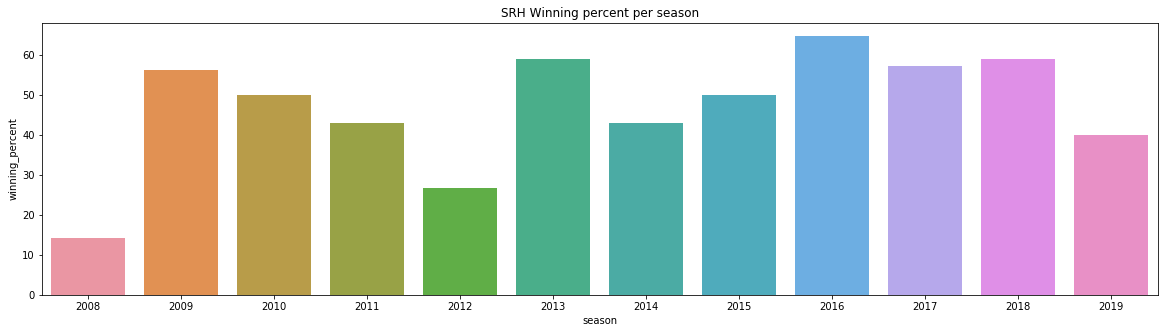

In [8]:
#checking RCB matches winning percentage per season

srh_wins = matches_srh[matches_srh.winner == 'Sunrisers Hyderabad']
# matches['season'].unique()
srh_season_wins = srh_wins.groupby('season')['winner'].count().reset_index()
srh_season_wins['total_matches_srh']=matches_srh.groupby('season')['id'].count().values
srh_season_wins['winning_percent']= (srh_season_wins.winner/srh_season_wins.total_matches_srh)*100

plt.figure(figsize=(20,5))
sns.barplot(x=srh_season_wins['season'], y = srh_season_wins['winning_percent'])
plt.title("SRH Winning percent per season")
plt.show()

In [10]:
#checking total matches played by KKR
matches_rr = matches[(matches['team1']=='Rajasthan Royals')|(matches['team2']=='Rajasthan Royals')]

wins_rr = np.sum(matches_rr.winner == 'Rajasthan Royals')

print("Total matches played by rr:", matches_rr.shape[0])
print("Total matches won by rr:", wins_rr)
print("rr winning percentage:", (wins_rr/matches_rr.shape[0]*100))

Total matches played by rr: 147
Total matches won by rr: 75
rr winning percentage: 51.02040816326531


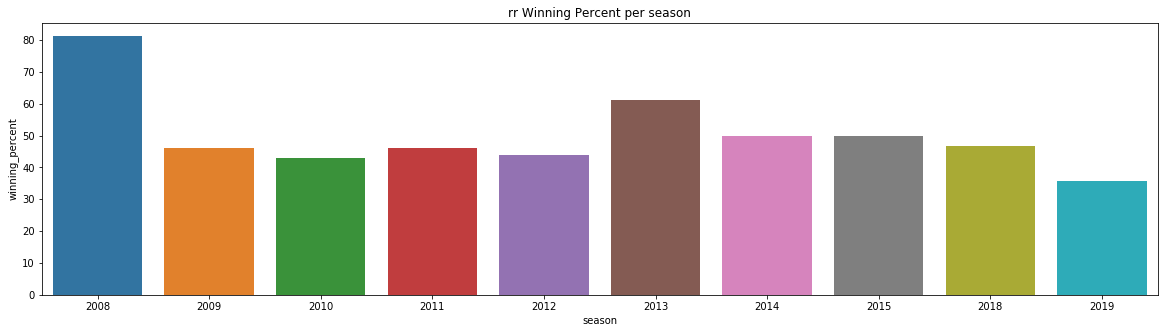

In [11]:
#checking Delhi Capitals matches winning percentage per season

rr_wins = matches_rr[matches_rr.winner == 'Rajasthan Royals']
# matches['season'].unique()
rr_season_wins = rr_wins.groupby('season')['winner'].count().reset_index()
rr_season_wins['total_matches_rr']=matches_rr.groupby('season')['id'].count().values
rr_season_wins['winning_percent']= (rr_season_wins.winner/rr_season_wins.total_matches_rr)*100

plt.figure(figsize=(20,5))
sns.barplot(x=rr_season_wins['season'], y = rr_season_wins['winning_percent'])
plt.title('rr Winning Percent per season')
plt.show()

In [13]:
#checking matches between 'SRH' and 'rr'
matches_srh_rr = matches[((matches['team1']=='Sunrisers Hyderabad')&(matches['team2']=='Rajasthan Royals'))|((matches['team2']=='Sunrisers Hyderabad')&(matches['team1']=='Rajasthan Royals'))]
matches_srh_rr.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
67,68,2008,Hyderabad,2008-04-24,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN
88,89,2008,Jaipur,2008-05-09,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,8,YK Pathan,Sawai Mansingh Stadium,MR Benson,AM Saheba,NaN
139,140,2009,Port Elizabeth,2009-05-02,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,3,YK Pathan,St George's Park,S Asnani,BG Jerling,NaN
154,155,2009,Kimberley,2009-05-11,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,53,0,DR Smith,De Beers Diamond Oval,GAV Baxter,HDPK Dharmasena,NaN
194,195,2010,Ahmedabad,2010-03-26,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,8,YK Pathan,"Sardar Patel Stadium, Motera",HDPK Dharmasena,SJA Taufel,NaN


season  winner             
2008    Rajasthan Royals       100.000000
2009    Rajasthan Royals        50.000000
        Sunrisers Hyderabad     50.000000
2010    Rajasthan Royals       100.000000
2011    Rajasthan Royals       100.000000
2012    Rajasthan Royals        50.000000
        Sunrisers Hyderabad     50.000000
2013    Rajasthan Royals        66.666667
        Sunrisers Hyderabad     33.333333
2014    Rajasthan Royals        50.000000
        Sunrisers Hyderabad     50.000000
2015    Rajasthan Royals        50.000000
        Sunrisers Hyderabad     50.000000
2018    Sunrisers Hyderabad    100.000000
2019    Rajasthan Royals        50.000000
        Sunrisers Hyderabad     50.000000
Name: winner, dtype: float64

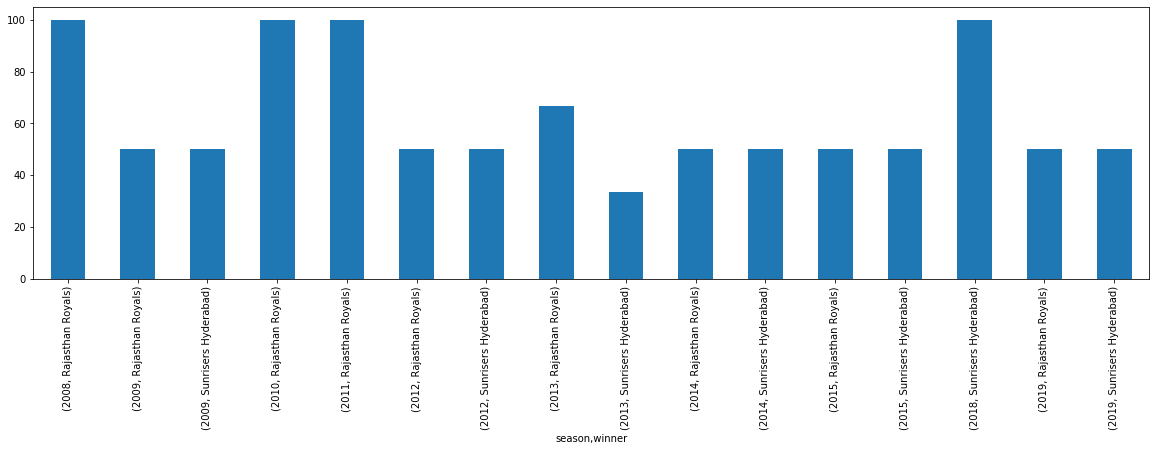

In [14]:
#Now lets see how srh has performed over rr
# matches_srh_rr = mat

res = matches_srh_rr.groupby('season')['winner'].value_counts(normalize=True)*100
display(res)

plt.figure(figsize=(20,5))
res.plot(kind='bar')
plt.show()

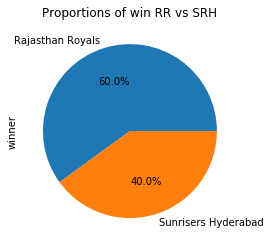

In [22]:
#get all rows when SRH and RR play against each other
srh_rr_tot = matches[((matches.team1 == 'Sunrisers Hyderabad')&(matches.team2 == 'Rajasthan Royals'))|((matches.team2 == 'Sunrisers Hyderabad')&(matches.team1 == 'Rajasthan Royals'))]

#get wins distribution for each of them
srh_rr_tot.winner.value_counts().plot('pie' , autopct='%1.1f%%')
plt.title("Proportions of win RR vs SRH")
plt.show()

**Inference:**
    - Data suggests that RR has a higher percentage to win when we calculate their history of how is their winning percentage agains other teams and vs SRH as well.

# 2. How many balls will Rashid Khan take to get to his first wicket?
    - He wont get a wicket
    - 0-8
    - 9-16
    - 17-24
    


In [102]:
#get rows when bowler is Rashid Khan
rk_bowls = deliveries[deliveries.bowler=='Rashid Khan']

#getting rows when Rashid Khan plays against Rajasthan Royals
rk_bowls_rr = rk_bowls[rk_bowls.batting_team == 'Rajasthan Royals']
rk_bowls_rr.match_id.unique()

array([ 7897,  7921, 11144, 11336], dtype=int64)

In [115]:
# getting different df for each match and calculate on which ball we got the first wickets
first_wickets = []
for m in rk_bowls_rr.match_id.unique():
    df = rk_bowls_rr[rk_bowls_rr.match_id==m]
    wickets=np.argwhere(df['player_dismissed'].notnull())
    first_wickets.append(wickets[0][0])
    


In [116]:
first_wickets

[19, 11, 1, 12]

<function matplotlib.pyplot.show(*args, **kw)>

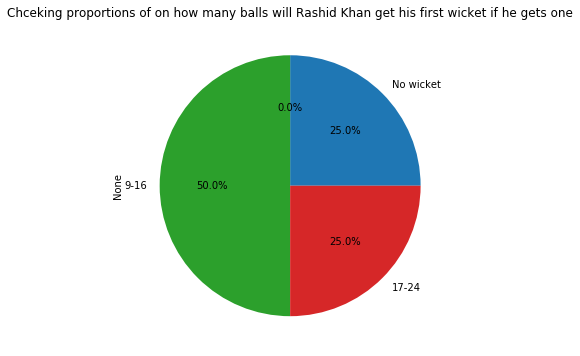

In [122]:
#check propoertions as per the options
pd.cut(first_wickets, bins=[0,1,9,17,25], labels = ['No wicket', '0-8', '9-16', '17-24']).value_counts().plot("pie", autopct='%1.1f%%', figsize=(20,6))
plt.title("Chceking proportions of on how many balls will Rashid Khan get his first wicket if he gets one")
plt.show

**Inference:**
    - We can see if Rashid Khan scores wicket its porbably having higher chances to get wickets between balls 9-16

# 3. How will David Warner get out?
    - Bowled
    - Caught
    - Run-out
    - Others

In [31]:
# get all rows where David Warner is batting
da_bats = deliveries[deliveries.batsman=='DA Warner']

#get all rows where da was wicketed out
da_wickets = da_bats[da_bats.player_dismissed.notnull()]

#get all wickets when playing against 'RR'
da_wickets_vs_rr = da_wickets[da_wickets.bowling_team == 'Rajasthan Royals']

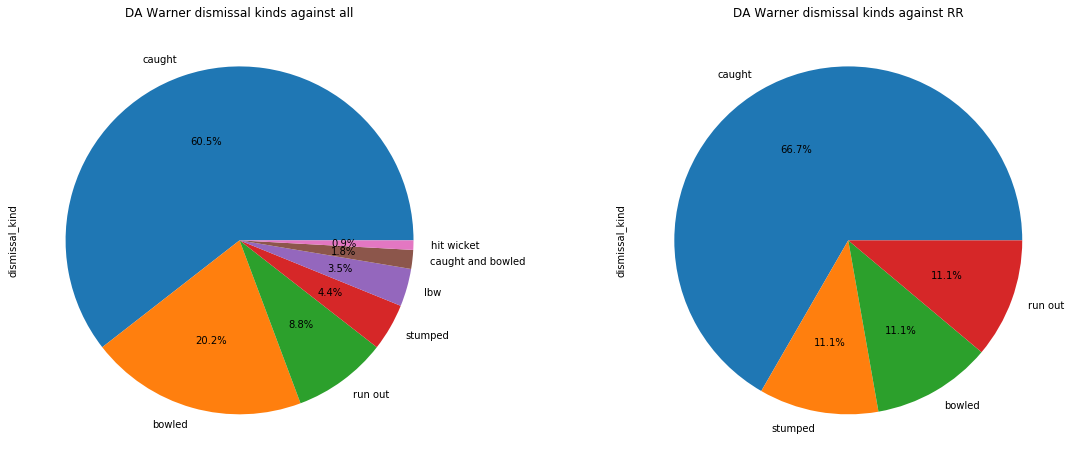

In [38]:
#checking visually proportions of how he gets out
fig, ax = plt.subplots(1,2, figsize=(20,8))

ax[0].set_title("DA Warner dismissal kinds against all")
da_wickets['dismissal_kind'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0])


ax[1].set_title("DA Warner dismissal kinds against RR")
da_wickets_vs_rr['dismissal_kind'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])

**Inference:**
    - We can see mostly Warner was "caught" out rather than other dismissal kinds. especially when playing against RR 66.6% of times Warner was caught out.

# 4. Who will score the most runs for RR in the match?
    - Steve Smith
    - Sanju Samson
    - Jos Butler
    - Others

In [71]:


#get all rows when RR bats
rr_bats = deliveries[deliveries.batting_team=='Rajasthan Royals']

#get all rows when RR bats against SRH
rr_bats_srh = rr_bats[rr_bats.bowling_team=='Sunrisers Hyderabad']

#check all team members scores when RR is playing, match wise
rr_bats_srh_runs = rr_bats_srh.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index()



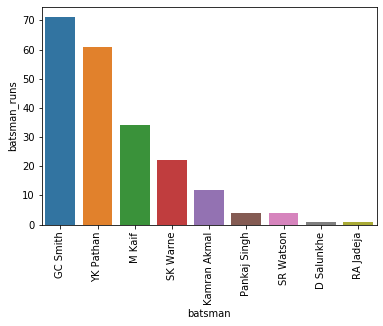

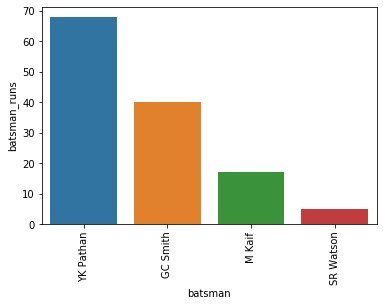

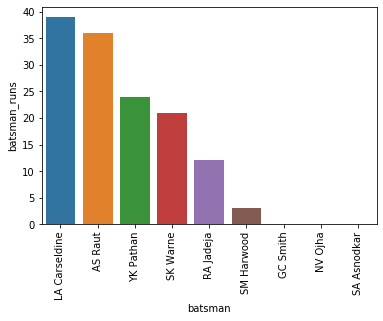

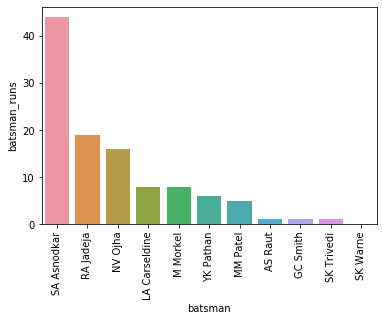

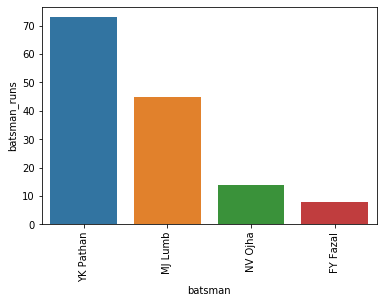

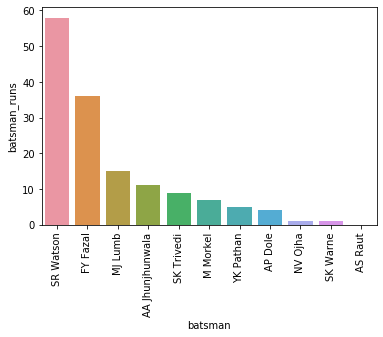

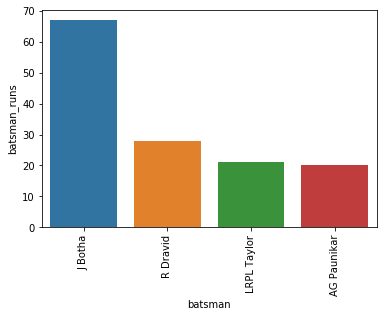

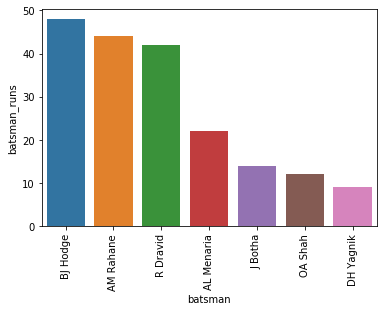

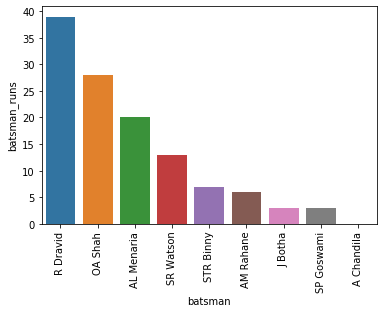

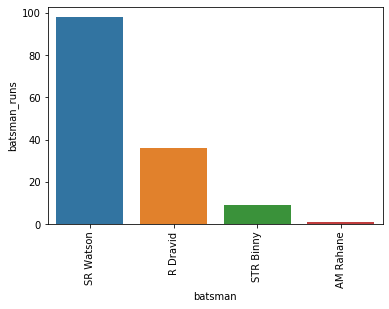

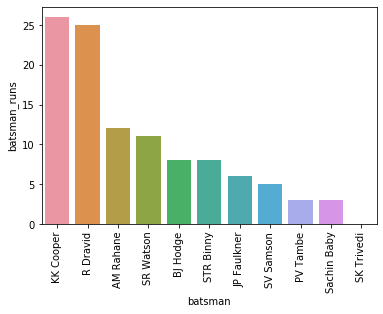

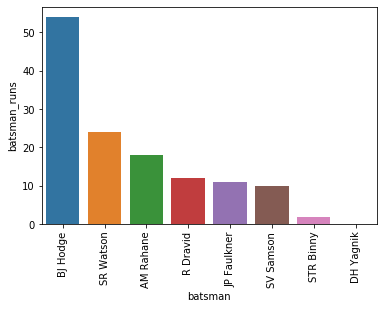

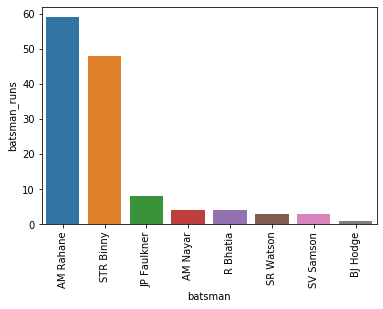

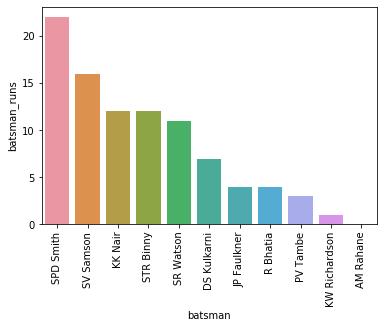

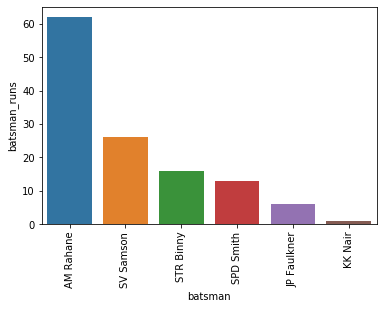

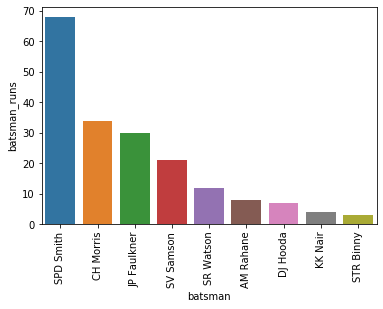

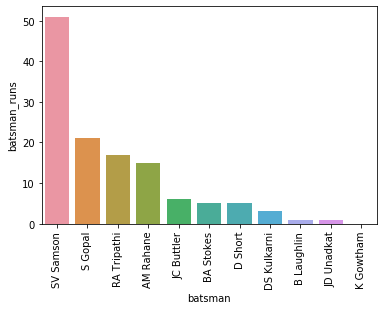

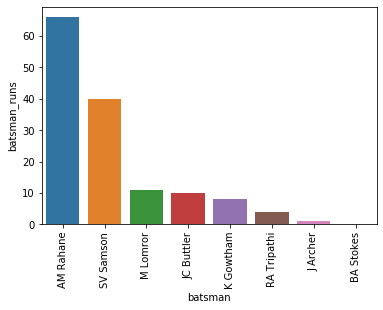

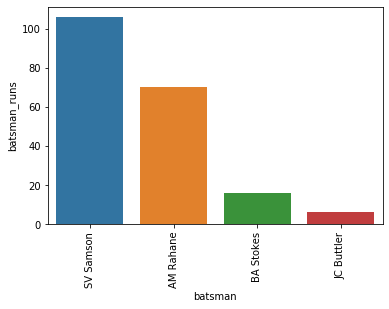

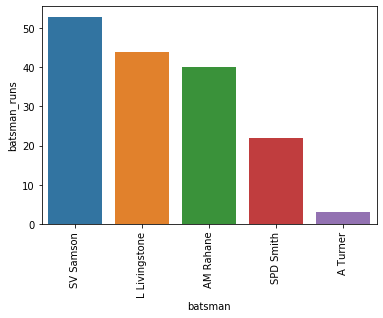

In [80]:
#checking visually batsman scores for each match for RR
for m in rr_bats_srh_runs['match_id'].unique():
    
    df = rr_bats_srh_runs[rr_bats_srh_runs.match_id == m].sort_values(by='batsman_runs', ascending=False)
#     display(df)
    sns.barplot(df['batsman'], df['batsman_runs'])
    plt.xticks(rotation=90)
    plt.show()

In [84]:
#checking player wise stats of which player 
#getting 
rr_bats_srh_runs.groupby(['batsman'])['batsman_runs'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
batsman,,,,,,,,
L Livingstone,1.0,44.000000,NaN,44.0,44.00,44.0,44.00,44.0
YK Pathan,6.0,39.500000,31.462676,5.0,10.50,42.5,66.25,73.0
CH Morris,1.0,34.000000,NaN,34.0,34.00,34.0,34.00,34.0
SV Samson,10.0,33.100000,31.263930,3.0,11.50,23.5,48.25,106.0
SPD Smith,4.0,31.250000,24.864634,13.0,19.75,22.0,33.50,68.0
AM Rahane,13.0,30.846154,26.679724,0.0,8.00,18.0,59.00,70.0
R Dravid,6.0,30.333333,11.075498,12.0,25.75,32.0,38.25,42.0
MJ Lumb,2.0,30.000000,21.213203,15.0,22.50,30.0,37.50,45.0
J Botha,3.0,28.000000,34.219877,3.0,8.50,14.0,40.50,67.0


In [93]:
rr_bats_srh_runs['batsman_new'] = rr_bats_srh_runs.batsman.map({'JC Buttler': 'Jos Buttler',
                             'SV Samson' : 'Sanju Samson',
                             'SPD Smith' : 'Steve Smith'})

rr_bats_srh_runs['batsman_new'] = rr_bats_srh_runs.batsman_new.replace(np.nan, 'Others')

rr_bats_srh_runs.groupby(['batsman_new'])['batsman_runs'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
batsman_new,,,,,,,,
Sanju Samson,10.0,33.100000,31.263930,3.0,11.50,23.5,48.25,106.0
Steve Smith,4.0,31.250000,24.864634,13.0,19.75,22.0,33.50,68.0
Others,136.0,17.492647,20.181398,0.0,3.00,9.0,24.00,98.0
Jos Buttler,3.0,7.333333,2.309401,6.0,6.00,6.0,8.00,10.0


**Inference:**
    We can see 'Sanju Samson' and 'Steve Smith' have almost the same average, however Samson sometimes outperform so we can say probably 'Sanju Samson' might score higher than Smith however in the list they come lower than the other players. The team has more players who can score really well. So probably 'Others' will be a safe option. 

# 5. How many no-balls will be bowled in the match?
    - 0-1
    - 2-3
    - 4-5
    - 6 or more

In [39]:
deliveries['noball_runs'].value_counts()

0    178364
1       698
2         9
5         6
3         1
Name: noball_runs, dtype: int64

In [40]:
noballs_bowls = deliveries[deliveries.noball_runs!=0]

#counting no ball runs during a match
noballs_bowls.groupby('match_id')['ball'].count().head()

match_id
1     2
7     3
10    1
11    2
12    1
Name: ball, dtype: int64

In [42]:
#checking wide bowls only when srh is playing
noballs_srh = noballs_bowls[(noballs_bowls.batting_team=='Sunrisers Hyderabad')|(noballs_bowls.bowling_team=='Sunrisers Hyderabad')]

noballs_srh.groupby('match_id')['ball'].count().head()

match_id
1     2
10    1
19    1
21    2
25    1
Name: ball, dtype: int64

In [43]:
nb_srh_count = noballs_srh.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Sunrisers Hyderabad in a match: {np.mean(nb_srh_count)}')
print(f'Median  wide bowls by Sunrisers Hyderabad in a match: {np.median(nb_srh_count)}')
print(f'Minimum  wide bowls by Sunrisers Hyderabad in a match: {np.min(nb_srh_count)}')
print(f'Maximum  wide bowls by Sunrisers Hyderabad in a match: {np.max(nb_srh_count)}')

Average wide bowls by Sunrisers Hyderabad in a match: 1.6764705882352942
Median  wide bowls by Sunrisers Hyderabad in a match: 1.0
Minimum  wide bowls by Sunrisers Hyderabad in a match: 1
Maximum  wide bowls by Sunrisers Hyderabad in a match: 5


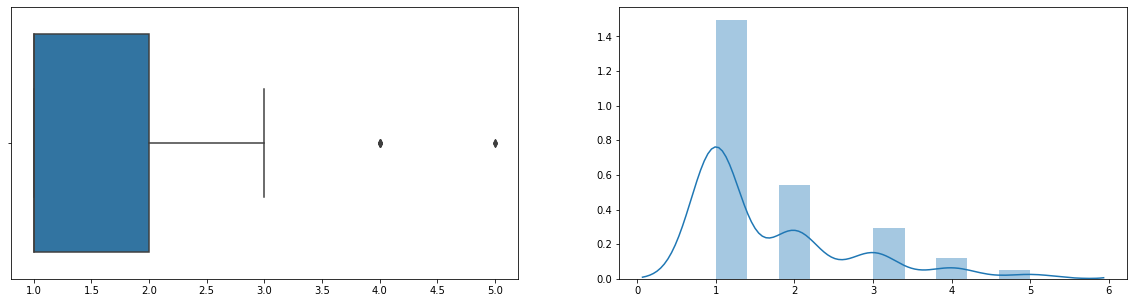

In [44]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_srh_count, ax = ax[0])
sns.distplot(nb_srh_count, ax=ax[1])


In [45]:
#checking wide bowls only when DC is playing
noballs_rr = noballs_bowls[(noballs_bowls.batting_team=='Rajasthan Royals')|(noballs_bowls.bowling_team=='Rajasthan Royals')]

noballs_rcb.groupby('match_id')['ball'].count().head()

match_id
1     2
12    1
27    2
30    2
55    1
Name: ball, dtype: int64

In [46]:
nb_rr_count = noballs_rr.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Kolkata Knight Riders in a match: {np.mean(nb_rr_count)}')
print(f'Median  wide bowls by Kolkata Knight Riders in a match: {np.median(nb_rr_count)}')
print(f'Minimum  wide bowls by Kolkata Knight Riders in a match: {np.min(nb_rr_count)}')
print(f'Maximum  wide bowls by Kolkata Knight Riders in a match: {np.max(nb_rr_count)}')

Average wide bowls by Kolkata Knight Riders in a match: 1.7191011235955056
Median  wide bowls by Kolkata Knight Riders in a match: 1.0
Minimum  wide bowls by Kolkata Knight Riders in a match: 1
Maximum  wide bowls by Kolkata Knight Riders in a match: 5


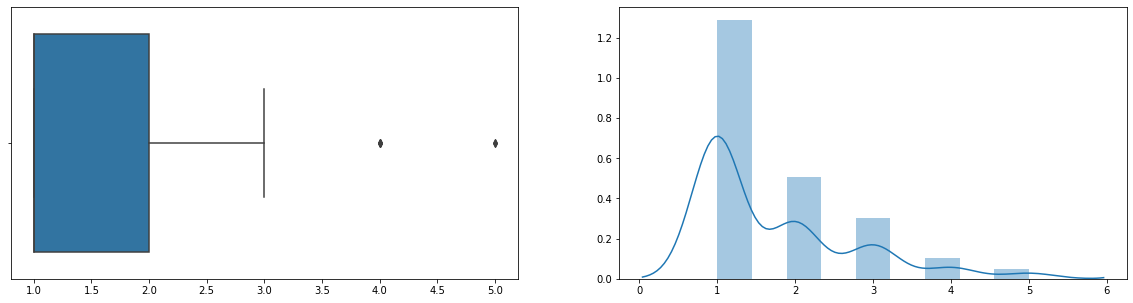

In [47]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_rr_count, ax = ax[0])
sns.distplot(nb_rr_count, ax=ax[1])


In [49]:
#lets also check the matches played between rr and srh
nb_srh_rr = noballs_bowls[((noballs_bowls.batting_team=='Rajasthan Royals')&(noballs_bowls.bowling_team=='Sunrisers Hyderabad'))|((noballs_bowls.batting_team=='Sunrisers Hyderabad')&(noballs_bowls.bowling_team=='Rajasthan Royals'))]

nb_srh_rr.groupby('match_id')['ball'].count()

match_id
68       2
89       1
140      1
210      1
236      2
328      1
373      1
529      1
7897     1
11144    1
Name: ball, dtype: int64

In [50]:
nb_srhrr = nb_srh_rr.groupby('match_id')['ball'].count()

print(f'Average wide bowls in (srh and rr) match: {np.mean(nb_srhrr)}')
print(f'Median  wide bowls in (srh and rr) match: {np.median(nb_srhrr)}')
print(f'Minimum  wide bowls in (srh and rr) match: {np.min(nb_srhrr)}')
print(f'Maximum  wide bowls in (srh and rr) match: {np.max(nb_srhrr)}')

Average wide bowls in (srh and rr) match: 1.2
Median  wide bowls in (srh and rr) match: 1.0
Minimum  wide bowls in (srh and rr) match: 1
Maximum  wide bowls in (srh and rr) match: 2


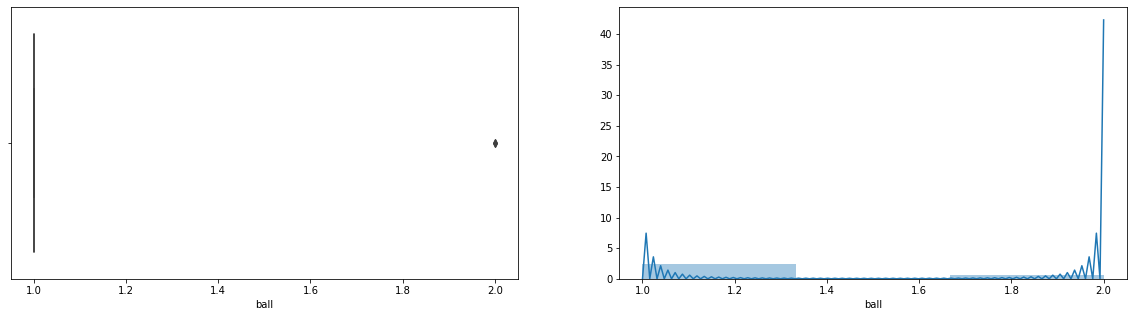

In [51]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_srhrr, ax = ax[0])
sns.distplot(nb_srhrr, ax=ax[1])

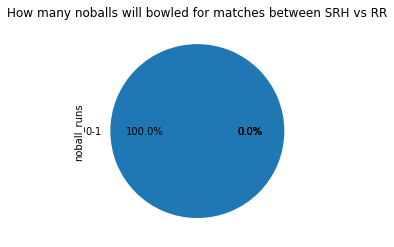

In [60]:
# get bins for getting probabilites as per per options 
srh_rr_noball = pd.cut(nb_srh_rr['noball_runs'], bins=[0,2,4,6,20], labels=['0-1', '2-3', '3-5', '6 or more'])
srh_rr_noball.value_counts().plot("pie", autopct='%1.1f%%')
plt.title("How many noballs will bowled for matches between SRH vs RR")
plt.show()

**Inference:**
    Well we can see RR vs SRH when playing with each other hardly have any noballs but in a very less number they dao which is only 1 noball.